# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- FTX Token: Can FTT’s recent 15% rally trigger a breakout over this supply zone.  Disclaimer: The information presented does not constitute financial, investment, trading, or other types of advice and is solely the opinion of the writer. FTX Token has lost 28% since the start of May, and the longer-term trend on the charts was bearish for the token. That said, there was an opportunity for lower timeframe traders [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/ftx-token-can-ftts-recent-15-rally-trigger-a-breakout-over-this-supply-zone/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Alberta hit by far more COVID deaths this year than in the same period in previous years | CBC News.  More than two years into the pandemic, Dr. Neeja Bakshi is still routinely breaking the painful news to families that their loved one is dying of COVID-19. And it's not going anywhere, she warns: Alberta's COVID-related death toll so far in 2022 is higher tha… ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/calgary/alberta-pandemic-omicron-deadliest-year-1.6481840) 

### Kainų kaita pandemijos metu

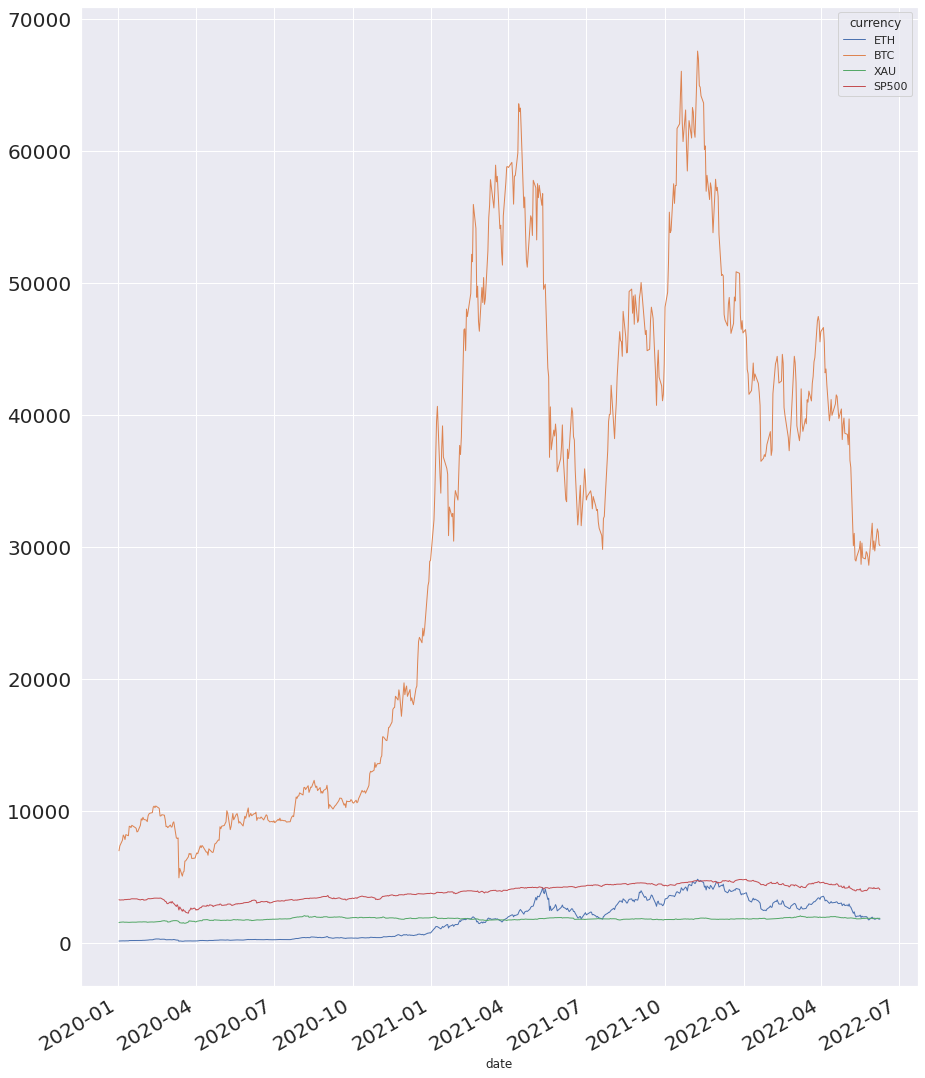

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.902840,0.248175,0.923111
BTC,0.902840,1.000000,0.195859,0.870741
XAU,0.248175,0.195859,1.000000,0.379039
SP500,0.923111,0.870741,0.379039,1.000000


In [8]:
#hide ### Koreliacijos matrica.

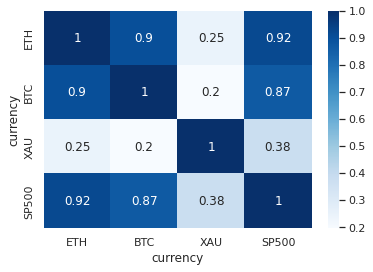

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')